In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [57]:
import numpy as np

class Perceptron2(object):
    
    def __init__(self, eta=0.01, epochs=10, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0.0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[1:] -=  update * xi
                self.w_[0] -=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)  
    
    def predict2(self, X):
        return self.net_input(X)

In [88]:
iris = datasets.load_iris()

X1 = iris.data[0:150, 0:2]
yy1 = iris.target[0:150]

X2 = iris.data[0:150, 0:2]
yy2 = iris.target[0:150]

X3 = iris.data[0:150, 0:2]
yy3 = iris.target[0:150]

In [89]:
def prepare_output(y, class_value):
    yy = []
    for x in y:
        if x == class_value:
            x = 1
        else:
            x = -1
        yy.append(x)
    y = yy
    return y

In [90]:
y1=prepare_output(yy1,0) 
y2=prepare_output(yy2,1) 
y3=prepare_output(yy3,2)

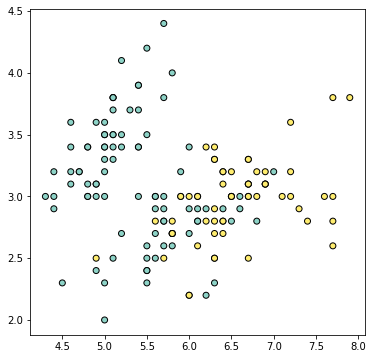

In [91]:
plt.figure(2, figsize=(6, 6))
plt.clf()
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=plt.cm.Set3, edgecolor='k')

In [92]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [93]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X1)
X1_train_std = sc.transform(X1_train)
X1_test_std = sc.transform(X1_test)

sc.fit(X2)
X2_train_std = sc.transform(X2_train)
X2_test_std = sc.transform(X2_test)

sc.fit(X3)
X3_train_std = sc.transform(X3_train)
X3_test_std = sc.transform(X3_test)


sc.fit(X3_train)
X3_train_std = sc.transform(X3_train)
X3_test_std = sc.transform(X3_test)

In [94]:
from sklearn.linear_model import Perceptron

ppn1 = Perceptron2(epochs=50, eta=0.01, random_state=0)
ppn1.fit(X1_train_std, y1_train)

ppn2 = Perceptron2(epochs=50, eta=0.01, random_state=0)
ppn2.fit(X2_train_std, y2_train)

ppn3 = Perceptron2(epochs=50, eta=0.01, random_state=0)
ppn3.fit(X3_train_std, y3_train)

In [95]:
from sklearn.metrics import accuracy_score
y1_pred = ppn1.predict(X1_test_std)
y2_pred = ppn2.predict(X2_test_std)
y3_pred = ppn3.predict(X3_test_std)

print('1.Niepasujące próbki: %d' %(y1_test != y1_pred).sum())

print('2.Niepasujące próbki: %d' %(y2_test != y2_pred).sum())

print('3.Niepasujące próbki: %d' %(y3_test != y3_pred).sum())

1.Niepasujące próbki: 0
2.Niepasujące próbki: 7
3.Niepasujące próbki: 8


In [96]:
sc = StandardScaler()
sc.fit(X1)
X1_std = sc.transform(X1)
X1_std

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

In [97]:
miss1 = 0
miss2 = 0
miss3 = 0
for x in range(0,50-1):
    y1_pred0 = ppn1.predict2(X1_std[x,:])
    y2_pred0 = ppn2.predict2(X1_std[x,:])
    y3_pred0 = ppn3.predict2(X1_std[x,:])  
    if np.argmax([y1_pred0,y2_pred0,y3_pred0]) != 0:
        miss1 +=1  

for x in range(50,100-1):
    y1_pred0 = ppn1.predict2(X1_std[x,:])
    y2_pred0 = ppn2.predict2(X1_std[x,:])
    y3_pred0 = ppn3.predict2(X1_std[x,:])  
    if np.argmax([y1_pred0,y2_pred0,y3_pred0]) != 1:
        miss2 +=1
    
for x in range(100,150-1):
    y1_pred0 = ppn1.predict2(X1_std[x,:])
    y2_pred0 = ppn2.predict2(X1_std[x,:])
    y3_pred0 = ppn3.predict2(X1_std[x,:]) 
    if np.argmax([y1_pred0,y2_pred0,y3_pred0]) != 2:
        miss3 +=1

print('1.Niepasujące próbki: ' + str(miss1))
print('2.Niepasujące próbki: ' + str(miss2))
print('3.Niepasujące próbki: ' + str(miss3))

1.Niepasujące próbki: 1
2.Niepasujące próbki: 7
3.Niepasujące próbki: 27


In [55]:
print(y1_pred0, y2_pred0, y3_pred0)

-0.04638333814382526 -0.027179758057887218 -0.007124671380043079
